# Introduction to Sentiment Analysis

We will use the Python library '__TextBlob__' for this workshop. There are other alternatives but TextBlob provides all the basic functionality is relatively easy to learn.

__TextBlob__ contains a pre-defined dictionary classifying negative and positive words. It works by analysing a given text and assigning individual scores to all the words it recognizes in a text. The final sentiment is calculated by  taking an average of all the individual sentiment scores. The range is from -1 (very negative) to +1 (very positive). 

## Install TextBlob and other libraries

The first thing we need to do is install the necesssary Python libraries - this is straightforward using PIP (Python's package manager). Run this code block to install them. If you get a message, 'Requirement already satisfied', you can move on to the next section.

In [4]:
# Run this code block the first time you use this Notebook
!pip install textblob
!pip install nltk
!pip install matplotlib
!pip install pandas 

In [17]:
from textblob import TextBlob
import pandas as pd
#import csv
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
import re
import urllib.request


## Analyse some Text

In this example we:

- provide a small fragment of text
- assign the text to a variable (a temporary container for holding the text)
- pass that variable to TextBlob.

TextBlob will then provide a result.

Please note in the code below some text is prepended with #. This tells Python not to process this text so we can use it to provide comments.

In [5]:
input_text = "I think that big tech is doing a horrible thing for our country. And I believe it is going to be a catastrophic mistake for them." #(Donald Trump, Nov 13, 2020)

# input_text = "This is a terrific book, the writing is superb, overall an excellent read" # (Amazon review)

blob = TextBlob(input_text) #pass the input text to Textblob

polarity = (blob.sentiment.polarity) #get a polarity score

print(polarity) 

-0.5


## Change the input text

You should have got a result of -0.5 which is quite negative. To try this again with a different piece of text, comment out the second line of code containing the input_text (place a # at the beginning of the line) and remove the # at the beginning of the 3rd line of code.

You should now get a score of 0.5 which is positive.

## Subjectivity

As well as providing a Sentiment score, TextBlob provides a Subjectivity score (between 0 and 1).  Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

We can improve the previous code by including a Subjectivity score. We will also do a small calculation to provide a textual indication of the overall Sentiment.


In [27]:


def classify_sentiment(polarity: float, eta: float=1e-6) -> str:
    """Recieves a polarity value and classifies it as 'Positive', 'Neutral', or
    'Negative'. For a 'Neutral' classification, rather than require polarity to 
    equal zero exactly, we require it to approximatel equal zero, with 
    tolerances given by `eta`
    """
    if polarity > eta:
        return "Positive"
    elif polarity < -eta:
        return "Negative"
    else:
        return "Neutral"

def simple_sa(input_text: str) -> tuple[float, float]:
    """Takes a sample text and returns polarity and subjectivity values"""
    blob = TextBlob(input_text) #pass the input text to TextBlob
    polarity = blob.sentiment.polarity #get a polarity score
    subjectivity = blob.sentiment.subjectivity #get a subjectivity score
    return polarity, subjectivity

def print_sa(polarity: float, subjectivity: float) -> None:
    print(f'Polarity: {polarity:.2f}') # rounds value to 2 d.p. for display
    print(f'Subjectivity: {subjectivity:.2f}')
    print(f'Sentiment: {classify_sentiment(polarity)}')

polarity, subjectivity = simple_sa("the tiger is a different feline") #(Donald Trump, Nov 13, 2020)

# polarity, subjectivity = simple_sa("This is a terrific book, the writing is superb, overall an excellent read") # (Amazon review)

print_sa(polarity, subjectivity)


Polarity: 0.00
Subjectivity: 0.60
Sentiment: Neutral


## Working with a text file

It is useful to be able to analyse a file rather than a string of text.

Our first dataset is here

<a href="https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/darwin-origin.txt" download>https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/darwin-origin.txt</a>

We can import it directly from GitHub

You can see how different books scores by changing which .txt file you are processing. go to <a href="https://github.com/DCS-training/SentimentAnalysis/blob/main/README.md" download>https://github.com/DCS-training/SentimentAnalysis/blob/main/README.md </a>

and see which other .txt files are available

In [28]:
url = 'https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/darwin-origin.txt'
darwin_origin = pd.read_fwf(url)
darwin_origin =darwin_origin.to_string()#Transform the dataframe into a string
print(darwin_origin)

                                                      ON THE ORIGIN OF SPECIES.
0                                                                 INTRODUCTION.
1          When on board H.M.S. 'Beagle,' as naturalist, I was much struck with
2        certain facts in the distribution of the inhabitants of South America,
3        and in the geological relations of the present to the past inhabitants
4        of that continent. These facts seemed to me to throw some light on the
5        origin of species--that mystery of mysteries, as it has been called by
6       one of our greatest philosophers. On my return home, it occurred to me,
7         in 1837, that something might perhaps be made out on this question by
8       patiently accumulating and reflecting on all sorts of facts which could
9      possibly have any bearing on it. After five years' work I allowed myself
10           to speculate on the subject, and drew up some short notes; these I
11      enlarged in 1844 into a sketch o

## Analyse the text file

Now we can change our previous code to open a text file rather than reading a string of text.

Notice in the following example I have used the Python 'round' function to convert the results to 2 decimal places.


In [29]:
polarity, subjectivity = simple_sa(darwin_origin) #get a polarity & subjectivity scores
print_sa(polarity, subjectivity)

Polarity: 0.10
Subjectivity: 0.44
Sentiment: Positive


### Try diffent text files

Experiment by analysing different text files. A selection can be found on the workshop home page (or use a file of you own choosing):

[https://github.com/DCS-training/SentimentAnalysis/blob/main/README.md](https://github.com/DCS-training/SentimentAnalysis/blob/main/README.md)

## CSV Files

You will often have data contained in a CSV file that you wish to analyse, this could be: the results of a survey, export from a database, collection of tweets.

The following code example takes as its input a CSV file containing all Donald Trump's tweets in 2020, analyses each one for sentiment and creates a new CSV file containing the original text plus two new columns containing the Sentiment and Polarity.

We can access the examples CSV files directly from GitHub 

<a href="https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/trump-tweet-archive.csv" download>https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/trump-tweet-archive.csv</a>

If you are using google colab, to see the newly created file you should go on the file explorer on the left handside and you will see the newly created.csv file.

In [70]:
url = 'https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/trump-tweets-2020.csv'
trump_tweets = pd.read_csv(url)

# Let's see what we've got here:
print(trump_tweets.dtypes) # what does `pandas` *think* the data-types are
trump_tweets.head(10)

id            float64
created_at     object
text           object
dtype: object


,id,created_at,text
0,1.212170e+18,01/01/2020 00:13,RT @heatherjones333: 'We Have Taken Appropriat...
1,1.212170e+18,01/01/2020 00:14,RT @heatherjones333: DEAR STUPID PEOPLE- PEACE...
2,1.212170e+18,01/01/2020 00:14,RT @heatherjones333: Congratulations Sleepy Jo...
3,1.212170e+18,01/01/2020 00:15,RT @heatherjones333: 🔥🔥🔥🔥🔥\nLindsey Graham: Tr...
4,1.212170e+18,01/01/2020 00:17,RT @heatherjones333: MAGNIFICENT TRUMP- KEEPIN...
5,1.212180e+18,01/01/2020 00:55,One of my greatest honors was to have gotten C...
6,1.212180e+18,01/01/2020 01:03,Thank you to the @dcexaminer Washington Examin...
7,1.212180e+18,01/01/2020 01:03,RT @LindseyGrahamSC: Just had a very good meet...
8,1.212180e+18,01/01/2020 01:05,"RT @dcexaminer: ""He has put the world on notic..."
9,1.212180e+18,01/01/2020 01:05,RT @LindseyGrahamSC: Very proud of President @...


Let's set the data-types in our dataframe to match the data:

In [71]:
trump_tweets['id'] = trump_tweets['id'].astype(int)
trump_tweets['created_at'] = pd.to_datetime(trump_tweets['created_at'], format='mixed')
trump_tweets['text'] = trump_tweets['text'].astype('string')
print(trump_tweets.dtypes) # just checking
trump_tweets.head(10)

id                     int64
created_at    datetime64[ns]
text          string[python]
dtype: object


,id,created_at,text
0,1212170000000000000,2020-01-01 00:13:00,RT @heatherjones333: 'We Have Taken Appropriat...
1,1212170000000000000,2020-01-01 00:14:00,RT @heatherjones333: DEAR STUPID PEOPLE- PEACE...
2,1212170000000000000,2020-01-01 00:14:00,RT @heatherjones333: Congratulations Sleepy Jo...
3,1212170000000000000,2020-01-01 00:15:00,RT @heatherjones333: 🔥🔥🔥🔥🔥 Lindsey Graham: Tru...
4,1212170000000000000,2020-01-01 00:17:00,RT @heatherjones333: MAGNIFICENT TRUMP- KEEPIN...
5,1212180000000000000,2020-01-01 00:55:00,One of my greatest honors was to have gotten C...
6,1212180000000000000,2020-01-01 01:03:00,Thank you to the @dcexaminer Washington Examin...
7,1212180000000000000,2020-01-01 01:03:00,RT @LindseyGrahamSC: Just had a very good meet...
8,1212180000000000000,2020-01-01 01:05:00,"RT @dcexaminer: ""He has put the world on notic..."
9,1212180000000000000,2020-01-01 01:05:00,RT @LindseyGrahamSC: Very proud of President @...


In [72]:

out_file = "trump-tweets-2020-sentiment.csv"

def get_polarity(text: str) -> float:
    """Returns the polarity of a text"""
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text: str) -> float:
    """Returns the polarity of a text"""
    return TextBlob(text).sentiment.subjectivity

# We can use pandas' `apply` function to apply our sentiment analysis functions to the data
# and add columns for polarity, subjectivty, and sentiment
def dataset_sa(data: pd.DataFrame) -> pd.DataFrame:
    data['polarity'] = data['text'].apply(get_polarity).astype(float)
    data['subjectivity'] = data['text'].apply(get_subjectivity).astype(float)
    data['sentiment'] = data['polarity'].apply(classify_sentiment)
    return data

trump_tweets = dataset_sa(trump_tweets)
trump_tweets.to_csv(out_file)

print (f'{len(trump_tweets)} tweets analysed for sentiment - results written to {out_file}')
trump_tweets.head()

9604 tweets analysed for sentiment - results written to trump-tweets-2020-sentiment.csv


,id,created_at,text,polarity,subjectivity,sentiment
0,1212170000000000000,2020-01-01 00:13:00,RT @heatherjones333: 'We Have Taken Appropriat...,0.50,0.5,Positive
1,1212170000000000000,2020-01-01 00:14:00,RT @heatherjones333: DEAR STUPID PEOPLE- PEACE...,-0.05,0.8,Negative
2,1212170000000000000,2020-01-01 00:14:00,RT @heatherjones333: Congratulations Sleepy Jo...,-0.60,0.7,Negative
3,1212170000000000000,2020-01-01 00:15:00,RT @heatherjones333: 🔥🔥🔥🔥🔥 Lindsey Graham: Tru...,0.00,0.0,Neutral
4,1212170000000000000,2020-01-01 00:17:00,RT @heatherjones333: MAGNIFICENT TRUMP- KEEPIN...,1.00,1.0,Positive


## Creating a Pie Chart of Sentiment of this CSV file

Now we have scored each tweet for sentiment, using the Python Library 'MatPlotLib' it is easy to visualise the aggregate sentiment in this CSV file.

The following code block, counts up the total number of each positive, negative and neutral tweets and outputs the result as a Pie Chart.

Positive: 4282
Neutral: 3539
Negative: 1783


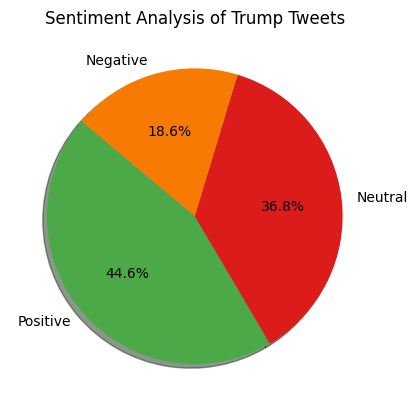

In [73]:
# We don't need to load the data again - we already have it stored as `trump_tweets`:
# but in case anyone is running these in separate sessions:
# trump_tweets = pd.read_csv('trump-tweets-2020-sentiment.csv')

sentiment_counts = dict(trump_tweets['sentiment'].value_counts())

# print the totals
for k, v in sentiment_counts.items():
    print(f'{k}: {v}') 

# and make a nice pie chart 
colours = ["#4CA948", "#DC1B1B", "#F77B02", ]
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), colors=colours,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Sentiment Analysis of Trump Tweets")
plt.show()

## Sentiment by Keyword

Now that we have a CSV file scored for sentiment we can search the file for a particular keyword. The following code searches the Tweets in our CSV file for a keyword and for every hit, prints out the text with a polarity score at the end, and also provides an overall sentiment score. Try changing the originsl keyword to one of your own choosing.


In [78]:
# We don't need to load the data again - we already have it stored as `trump_tweets`:
# but in case anyone is running these in separate sessions:
# trump_tweets = pd.read_csv('trump-tweets-2020-sentiment.csv')

keyword = "dog"

def bracket_kw(text: str, kw: str) -> str:
    """Highlights keyword by placing it in square brackets"""
    return text.replace(keyword, f"[{keyword}]")

def sentiment_by_kw(dataset: pd.DataFrame, keyword:str, verbose=True) -> tuple[int, float]:
    cnt = 0
    polarityscore = 0.0
    keyword = keyword.lower()
    for row in dataset.iloc:

        text = row['text']

        if keyword in text.lower():

            cnt += 1
            polarityscore = polarityscore + row['polarity']
            if verbose:
                print(f"{cnt}. {bracket_kw(text, keyword)}, {row['polarity']:.2f}\n")
    return cnt, polarityscore

def display_kw_sa(cnt: int, polarityscore: float) -> None:
    if cnt > 0:
        avgpolarity = (polarityscore / cnt)
        avgsentiment = classify_sentiment(avgpolarity)

        print ('==================================================')
        print (f'{cnt} occurences of "{keyword.lstrip()}" found in text')
        print (f'Average Sentiment: {avgsentiment}')
        print (f'Average Polarity: {avgpolarity:.3f}')
        print ('==================================================')

    else:
        print ('==================================================')
        print (f'No occurences of {keyword} found in text')
        print ('==================================================')

cnt, polarityscore = sentiment_by_kw(trump_tweets, keyword)
display_kw_sa(cnt, polarityscore)

1. RT @Sense[dog]: @realDonaldTrump Thank you Mr. President., 0.00

2. RT @DonaldJTrumpJr: Despite nonstop efforts from Democrats and their media lap [dog]s to destroy Donald Trump and his efforts to rebuild Amer…, -0.20

3. RT @jsolomonReports: Trump names White House lawyer to be watch[dog] over coronavirus bailout money https://t.co/7ajl4T3tny, 0.00

4. So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like [dog]s, and obviously want back in. Sad!, -0.08

5. RT @TrumpWarRoom: Joe Biden spent 44 years in Washington standing up FOR China.

You can't teach an old [dog] new tricks. https://t.co/vTjhKP…, 0.05

6. Lyin’ Brian Williams of MSDNC, a Concast Scam Company, wouldn’t know the truth if it was nailed to his wooden forehead. Remember when he lied about his bravery in a helicopter? Totally made up st

## Analysing a text file by keyword

We can do a similar analysis by keyword of a text file. Here we will use the 'origin-intro.txt' we used earlier. This time the code will read in the sentence by sentence so we can analyse the keyword in context rather than just provide an overall result.

Also, unlike the Trump Sentiment CSV we have not pre-analysed the text so we will do this 'on the fly' with TextBlob as we read each line. Try changing the keyword, but also experiment with different text files.

In [90]:

searchterm = 'natural' # Choose a term to search for
url = 'https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/darwin-origin.txt'
#Import file 

# A couple of functions to get text data and process it into a dataframe. Note that I've 
# separated these into two functions, as later we will need these jobs to be done separately.
# It's always better to write more, simpler functions, rather than fewer, more complicated
def text_from_url(url: str) -> str:
    # read file from url
    input_file = pd.read_fwf(url)
    # Transform the dataframe into a string
    input_text = input_file.to_string() 
    # change input text to lower case
    text = input_text.lower()
    return text

def text_to_df(text: str) -> pd.DataFrame:
    # split the text into sentences
    sentences = sent_tokenize(text)
    # and reeturn as a dataframe
    return pd.DataFrame({'text': sentences})

# get the data
darwin_origin_df = text_to_df(text_from_url(url))
# analyse sentiment
darwin_origin_df = dataset_sa(darwin_origin_df)

# analyse by keyword. Note that by structuring our code with functions, we can easily reuse it
cnt, polarityscore = sentiment_by_kw(darwin_origin_df, keyword)
display_kw_sa(cnt, polarityscore)


1. hairless [dog]s have imperfect teeth; long-haired and
291         coarse-haired animals are apt to have, as is asserted, long or many
292      horns; pigeons with feathered feet have skin between their outer toes;
293         pigeons with short beaks have small feet, and those with long beaks
294       large feet., 0.14

2. this point, if it could be cleared up, would be
424        interesting; if, for instance, it could be shown that the greyhound,
425     bloodhound, terrier, spaniel, and bull-[dog], which we all know propagate
426    their kind so truly, were the offspring of any single species, then such
427     facts would have great weight in making us doubt about the immutability
428       of the many very closely allied and natural species--for instance, of
429        the many foxes--inhabiting different quarters of the world., 0.31

3. i do not
430        believe, as we shall presently see, that all our [dog]s have descended
431          from any one wild species; but, in t

## Analysing a text by sections

Often you will want to analyse the different sections of a text to compare sentiment throughout. For example, analysing the sentiment of different chapters in a novel. To do this, it is necessary to identify in the text the various sections you wish to examine. Although it is often possible to use Python to do this, because the structure of documents can vary it is often easier to mark up the document manually. In the following example, I have taken a novel (Pride and Prejudice by Jane Austen) and inserted `<chapter></chapter>` tags to indicate where a chapter begins and ends.

```

<chapter>
    CHAPTER 1
    It is a truth universally acknowledged, that a single man in possession
    of a good fortune, must be in want of a wife... 
</chapter>

<chapter>
    CHAPTER 2
    Mr. Bennet was among the earliest of those who waited on Mr. Bingley...
</chapter>

```

You can download it from here

<a href="https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/austen-pride-prejudice.txt" download>https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/austen-pride-prejudice.txt</a>

### Analyse by Chapter

Once you have uploaded the Pride and Prejudice text run the following code block.

This will analyse each chapter for sentiment, print out a score for each chapter and an overall score. I will also create a csv file (named the same as the input file but with a .csv extension) that can be used to create avisualisation.


In [100]:
text_url = 'https://raw.githubusercontent.com/DCS-training/SentimentAnalysis/main/austen-pride.txt'
csv_name = 'austen-pride.csv'

# Download text file from URL and read its contents
response = urllib.request.urlopen(text_url)
austen_pride = response.read().decode('utf-8')

# writeFile = csv.writer(open(csvName, "w"))


title = re.findall('<title>(.*?)</title>', austen_pride)
author = re.findall('<author>(.*?)</author>', austen_pride, re.DOTALL)

def chapterise(book: str) -> tuple[list[str]]:
    return re.findall('<chapter>(.*?)</chapter>', book, re.DOTALL)



def analyse_chapter(chapter):
    """breaks a chapter into sentences, runs sentiment analysis on the sentences,
    and gives the mean sentiment
    """
    sentence_data = text_to_df(chapter)
    sentence_data = dataset_sa(sentence_data)
    chap_score = sentence_data['polarity'].mean()
    return chap_score

def analyse_by_chapters(book: str) -> pd.DataFrame:
    chapters = chapterise(book)
    df = pd.DataFrame({
        'chapter': list(range(1, len(chapters)+1)),
        'polarity': [analyse_chapter(chapter) for chapter in chapters]
    })
    df['sentiment'] = df['polarity'].apply(classify_sentiment)
    return df

chapters_df = analyse_by_chapters(austen_pride)
chapters_df.to_csv(csv_name)
print (f'csv created - {csv_name}')



def disp_chap_analysis(df: pd.DataFrame, title: list[str], author: list[str]) -> None:
    for row in df.iloc:
        print(f'{row['chapter']}: {row['polarity']:.3f}, {row['sentiment']}')
    avgSent = df['polarity'].mean()
    print ('***************************************')
    print (' '.join(title))
    print ('by')
    print (' '.join(author))
    print (f'Average chapter sentiment = {avgSent:.3f}')
    print ('***************************************')

disp_chap_analysis(chapters_df, title, author)


csv created - austen-pride.csv
1: 0.050, Positive
2: 0.048, Positive
3: 0.155, Positive
4: 0.212, Positive
5: 0.151, Positive
6: 0.133, Positive
7: 0.108, Positive
8: 0.107, Positive
9: 0.146, Positive
10: 0.101, Positive
11: 0.102, Positive
12: 0.067, Positive
13: 0.100, Positive
14: 0.167, Positive
15: 0.103, Positive
16: 0.057, Positive
17: 0.052, Positive
18: 0.086, Positive
19: 0.083, Positive
20: 0.057, Positive
21: 0.102, Positive
22: 0.193, Positive
23: 0.115, Positive
24: 0.113, Positive
25: 0.117, Positive
26: 0.100, Positive
27: 0.061, Positive
28: 0.077, Positive
29: 0.088, Positive
30: 0.071, Positive
31: 0.143, Positive
32: 0.210, Positive
33: 0.070, Positive
34: 0.059, Positive
35: 0.066, Positive
36: 0.031, Positive
37: 0.124, Positive
38: 0.136, Positive
39: 0.145, Positive
40: 0.026, Positive
41: 0.076, Positive
42: 0.053, Positive
43: 0.144, Positive
44: 0.117, Positive
45: 0.116, Positive
46: 0.013, Positive
47: 0.072, Positive
48: 0.080, Positive
49: 0.084, Positiv

## Create a Barchart to illustrate results

Using the CSV file created with last piece of code we can create a visualisation. 

Before running the next code block, from the top Noteable menu select: Cell > All Output > Clear

Run the following code block to import the CSV and create a barchart.

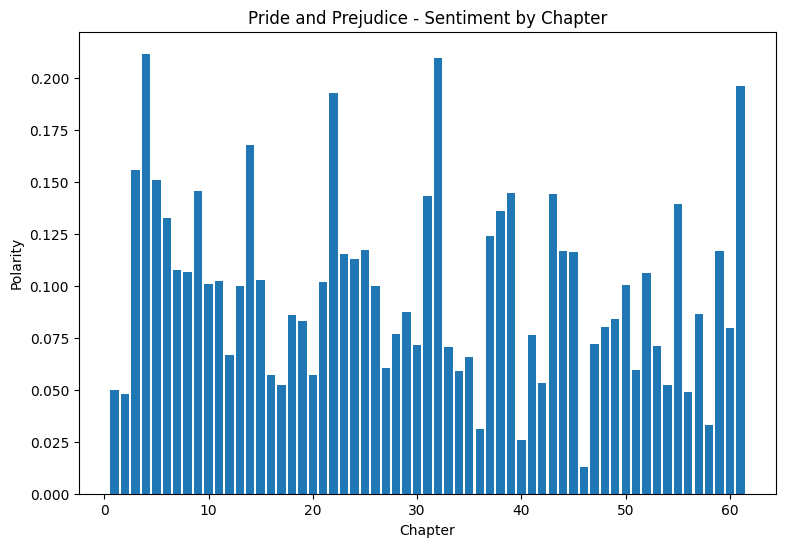

In [101]:


plt.figure(figsize=(9,6))

plt.bar(
    x=chapters_df['chapter'],
    height=chapters_df['polarity']
)

plt.title('Pride and Prejudice - Sentiment by Chapter')

plt.xlabel('Chapter')
plt.ylabel('Polarity')

plt.show()

## Further Exercises

Experiment by analysing different text files. A selection can be found on this GitHub Repo
You can either save them on your pc and import them or import them directly from the GitHub Repo. If you are using Noteable, once the file has been saved to your computer, go back to the Noteable home tab in the browser.

* Select 'Upload' from the top right of the page. 
* Browse to the file.
* Click 'Select'
* Click on the blue 'Upload' button

The file is now available to be used in Noteable.
